# Análise de dados - Roubos de celulares na cidade de São Paulo em janeiro de 2023

- Fonte dos dados: [www.ssp.sp.gov.br](http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx)
- Linguagem utiliziada: Python

## Pré-processamento

Nessa etapa será realizado um procedimento de limpeza de dados. 

### Importação das bibliotecas

In [48]:
# Importação do pandas, unicode e date:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
from datetime import date

### Leitura dos dados

In [49]:
# Leitura dos dados para o dataframe df:
df = pd.read_excel('DadosBO_2023_1(ROUBO DE CELULAR).xlsx')
df

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2023,2059,2059/2023,2023-01-01 00:08:34,2023-01-01 00:08:34,2022-12-29,NaN,A NOITE,2022-12-30,2023-01-01 00:08:34,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi
1,2023,27,27/2023,2023-01-01 00:39:51,2023-01-01 00:39:51,2022-12-31,23:32:00,A NOITE,2023-01-01,2023-01-01 00:39:51,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
2,2023,8583,8583/2023,2023-01-01 00:47:10,2023-01-01 00:47:12,2022-01-30,23:20:00,A NOITE,2022-12-31,2023-01-01 00:47:10,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
3,2023,8584,8584/2023,2023-01-01 00:47:35,2023-01-01 00:47:38,2022-12-30,22:05:00,A NOITE,2022-12-31,2023-01-01 00:47:35,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
4,2023,8588,8588/2023,2023-01-01 00:48:47,2023-01-01 00:48:49,2022-12-30,20:30:00,A NOITE,2022-12-31,2023-01-01 00:48:47,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,2023,33677,33677/2023,2023-01-31 20:15:03,2023-01-31 20:15:03,2023-01-26,17:10:00,A TARDE,2023-01-31,2023-01-31 20:15:03,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
12860,2023,462,462/2023,2023-01-31 20:57:22,2023-01-31 20:57:22,2023-01-31,11:45:00,PELA MANHÃ,2023-01-31,2023-01-31 20:57:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
12861,2023,19509,19509/2023,2023-01-31 21:09:57,2023-01-31 21:09:57,2023-01-19,23:00:00,A NOITE,2023-01-31,2023-01-31 21:09:57,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung
12862,2023,169842,169842/2023,2023-01-31 22:19:54,2023-01-31 22:20:00,2023-01-29,22:00:00,A NOITE,2023-01-31,2023-01-31 22:19:54,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung


### Removendo dados duplicados

In [50]:
# Remoção de dados duplicados:
df.drop_duplicates(inplace=True)    # Dropa as tuplas duplicadas do dataframe
df

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2023,2059,2059/2023,2023-01-01 00:08:34,2023-01-01 00:08:34,2022-12-29,NaN,A NOITE,2022-12-30,2023-01-01 00:08:34,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi
1,2023,27,27/2023,2023-01-01 00:39:51,2023-01-01 00:39:51,2022-12-31,23:32:00,A NOITE,2023-01-01,2023-01-01 00:39:51,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
2,2023,8583,8583/2023,2023-01-01 00:47:10,2023-01-01 00:47:12,2022-01-30,23:20:00,A NOITE,2022-12-31,2023-01-01 00:47:10,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
3,2023,8584,8584/2023,2023-01-01 00:47:35,2023-01-01 00:47:38,2022-12-30,22:05:00,A NOITE,2022-12-31,2023-01-01 00:47:35,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
4,2023,8588,8588/2023,2023-01-01 00:48:47,2023-01-01 00:48:49,2022-12-30,20:30:00,A NOITE,2022-12-31,2023-01-01 00:48:47,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,2023,33677,33677/2023,2023-01-31 20:15:03,2023-01-31 20:15:03,2023-01-26,17:10:00,A TARDE,2023-01-31,2023-01-31 20:15:03,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
12860,2023,462,462/2023,2023-01-31 20:57:22,2023-01-31 20:57:22,2023-01-31,11:45:00,PELA MANHÃ,2023-01-31,2023-01-31 20:57:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
12861,2023,19509,19509/2023,2023-01-31 21:09:57,2023-01-31 21:09:57,2023-01-19,23:00:00,A NOITE,2023-01-31,2023-01-31 21:09:57,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung
12862,2023,169842,169842/2023,2023-01-31 22:19:54,2023-01-31 22:20:00,2023-01-29,22:00:00,A NOITE,2023-01-31,2023-01-31 22:19:54,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung


### Filtrando os dados da cidade de São Paulo

In [51]:
# Filtragem de dados pela cidade de São Paulo:
df.query('CIDADE=="S.PAULO"', inplace=True)
df

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
2,2023,8583,8583/2023,2023-01-01 00:47:10,2023-01-01 00:47:12,2022-01-30,23:20:00,A NOITE,2022-12-31,2023-01-01 00:47:10,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
3,2023,8584,8584/2023,2023-01-01 00:47:35,2023-01-01 00:47:38,2022-12-30,22:05:00,A NOITE,2022-12-31,2023-01-01 00:47:35,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
6,2023,8591,8591/2023,2023-01-01 00:50:06,2023-01-01 00:50:10,2022-12-30,22:30:00,A NOITE,2022-12-31,2023-01-01 00:50:06,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung
7,2023,8594,8594/2023,2023-01-01 00:50:51,2023-01-01 00:50:55,2022-12-30,22:15:00,A NOITE,2022-12-31,2023-01-01 00:50:51,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
9,2023,8604,8604/2023,2023-01-01 00:53:34,2023-01-01 00:53:37,2022-12-30,23:00:00,A NOITE,2022-12-31,2023-01-01 00:53:34,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12851,2023,197,197/2023,2023-01-31 15:03:07,2023-01-31 15:03:07,2023-01-31,08:00:00,PELA MANHÃ,2023-01-31,2023-01-31 15:03:07,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola
12853,2023,154937,154937/2023,2023-01-31 15:47:37,2023-01-31 15:47:37,2023-01-27,20:30:00,A NOITE,2023-01-27,2023-01-31 15:47:37,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
12856,2023,236,236/2023,2023-01-31 17:05:21,2023-01-31 17:05:21,2023-01-29,21:00:00,A NOITE,2023-01-31,2023-01-31 17:05:21,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
12858,2023,227,227/2023,2023-01-31 18:12:41,2023-01-31 18:12:41,2023-01-31,13:00:00,A TARDE,2023-01-31,2023-01-31 18:12:41,...,FAG3E92,SP,S.PAULO,Cinza,VW/T CROSS TSI,2022.0,2022.0,AUTOMOVEL,1.0,Samsung


### Padronizando strings

In [52]:
# Transformar string para minúsculo e padronizar:

df.columns = df.columns.str.lower()                                                                                     # Converte os rótulos das colunas para lowercase
stringData =  list(filter(lambda x : df[x].dtype == 'object', df.columns.values))                                       # Filtra apenas as colunas que podem possuir dados do tipo string

df[stringData] = df.loc[ : , stringData ].applymap(lambda x :  str(x).lower().strip(), na_action='ignore')              # Converte todos os dados do tipo string para lowercase e retira os espaços em branco no início/fim(ignora os valores NaN).
df['peridoocorrencia'] = df.loc[ : , ['peridoocorrencia']].applymap(lambda x : str(x).split()[-1], na_action='ignore')  # Formata as strings da coluna 'periodoocorrencia' para um padrão de uma palavra.
df['marca_celular'] = df.loc[ : , ['marca_celular']].applymap(lambda x : str(x).split()[0], na_action='ignore')         # Retira o modelo do celular inserido de forma incorreta nessa coluna.
df['bairro'] = df.loc[ : , ['bairro']].applymap(lambda x : '' if unidecode(str(x)) == 'nan' else unidecode(str(x)))     # Retira a acentuação dos valores da coluna 'bairro'
df

,ano_bo,num_bo,numero_boletim,bo_iniciado,bo_emitido,dataocorrencia,horaocorrencia,peridoocorrencia,datacomunicacao,dataelaboracao,...,placa_veiculo,uf_veiculo,cidade_veiculo,descr_cor_veiculo,descr_marca_veiculo,ano_fabricacao,ano_modelo,descr_tipo_veiculo,quant_celular,marca_celular
2,2023,8583,8583/2023,2023-01-01 00:47:10,2023-01-01 00:47:12,2022-01-30,23:20:00,noite,2022-12-31,2023-01-01 00:47:10,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,apple
3,2023,8584,8584/2023,2023-01-01 00:47:35,2023-01-01 00:47:38,2022-12-30,22:05:00,noite,2022-12-31,2023-01-01 00:47:35,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,apple
6,2023,8591,8591/2023,2023-01-01 00:50:06,2023-01-01 00:50:10,2022-12-30,22:30:00,noite,2022-12-31,2023-01-01 00:50:06,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,samsung
7,2023,8594,8594/2023,2023-01-01 00:50:51,2023-01-01 00:50:55,2022-12-30,22:15:00,noite,2022-12-31,2023-01-01 00:50:51,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,apple
9,2023,8604,8604/2023,2023-01-01 00:53:34,2023-01-01 00:53:37,2022-12-30,23:00:00,noite,2022-12-31,2023-01-01 00:53:34,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12851,2023,197,197/2023,2023-01-31 15:03:07,2023-01-31 15:03:07,2023-01-31,08:00:00,manhã,2023-01-31,2023-01-31 15:03:07,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,motorola
12853,2023,154937,154937/2023,2023-01-31 15:47:37,2023-01-31 15:47:37,2023-01-27,20:30:00,noite,2023-01-27,2023-01-31 15:47:37,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,apple
12856,2023,236,236/2023,2023-01-31 17:05:21,2023-01-31 17:05:21,2023-01-29,21:00:00,noite,2023-01-31,2023-01-31 17:05:21,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,apple
12858,2023,227,227/2023,2023-01-31 18:12:41,2023-01-31 18:12:41,2023-01-31,13:00:00,tarde,2023-01-31,2023-01-31 18:12:41,...,fag3e92,sp,s.paulo,cinza,vw/t cross tsi,2022.0,2022.0,automovel,1.0,samsung


### Formatando dados temporais

In [53]:
# Transformar dados temporais para o tipo apropriado:
df[['dataocorrencia', 'datacomunicacao']] = df.loc[ : , ['dataocorrencia', 'datacomunicacao']].applymap(lambda x : x.date())   # Removendo a hora default do tipo 'datetime'

## Análise exploratória com visualização

Esta etapa contém os resultados gráficos que respodem as seguintes perguntas:

1. Quais as marcas de celulares mais roubadas na ciade de São Paulo em janeiro de 2023?
1. Quais os dias do mês com mais registros de B.O?
1. Quais os 20 bairros com mais ocorrência de roubos nesse período?
1. Qual período do dia ocorreram as maiores quantidade de roubos?

### Marcas de celulares mais roubadas

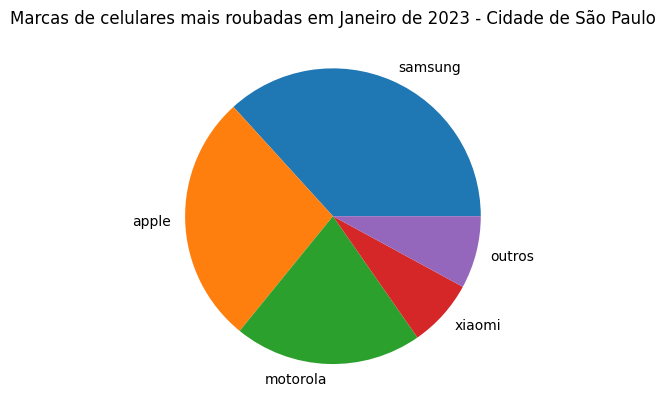

In [54]:
# Análise exploratória com visualizações (gráficos e estatísticas):

# Marcas mais roubadas:
dadosMarcas = df['marca_celular'].value_counts()
rotulos = list(dadosMarcas.index)
x = dadosMarcas.values

# Definindo os dados da fatia "outros":
limiteInferior = 0.04

total = sum(x)
outros = total - sum([valor for valor in x if valor / total >= limiteInferior])

x = [valor for valor in x if valor / total >= limiteInferior]
rotulos = [rotulo for indice, rotulo in enumerate(rotulos) if indice < len(x) and x[indice] / total >= limiteInferior]

if 'outros' in rotulos:
    x[rotulos.index('outros')] += outros
else:    
    x.append(outros)
    rotulos.append('outros')

plt.pie(x, labels=rotulos)
plt.title('Marcas de celulares mais roubadas em Janeiro de 2023 - Cidade de São Paulo')
plt.show()

### Dias com mais registros de B.O

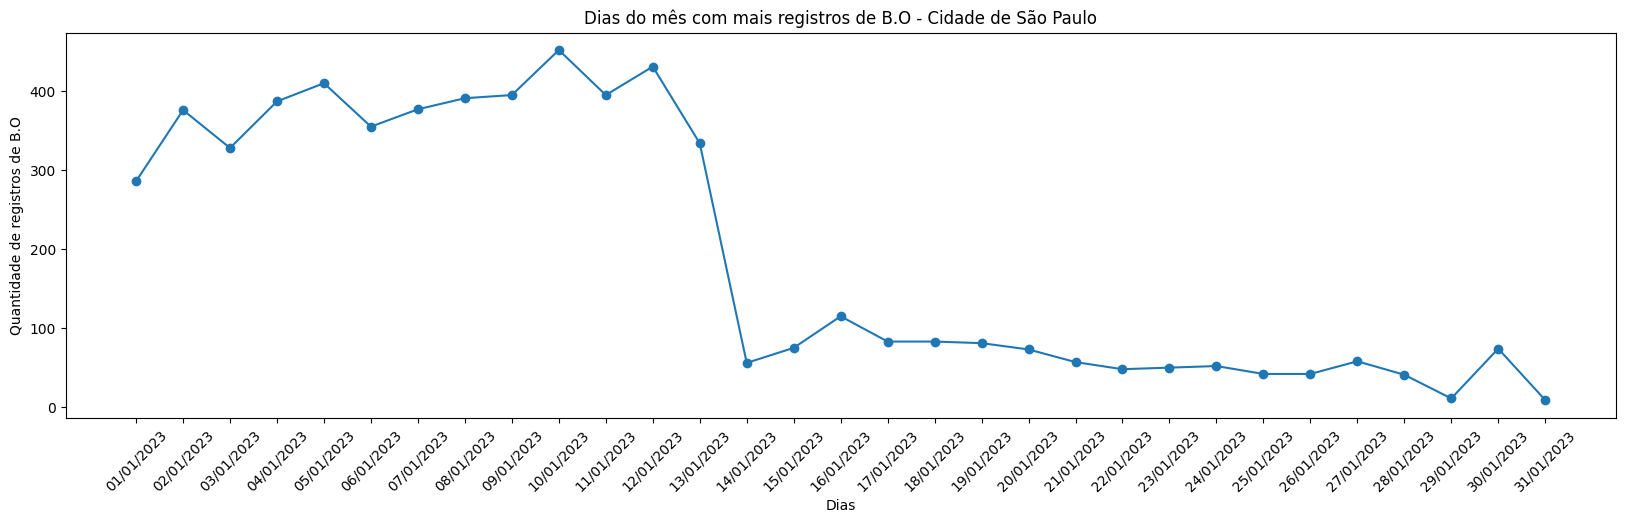

In [55]:
# Dias com mais registros de B.O

dadosDiasBo = df['bo_iniciado'].map(lambda x : x.date().strftime('%d/%m/%Y')).value_counts().to_dict()
dataDiasBo = sorted(dadosDiasBo)
valoresDiasBo = [dadosDiasBo[v] for v in dataDiasBo]

plt.figure(figsize=(20, 5))
plt.plot(dataDiasBo, valoresDiasBo, marker='o')
plt.title('Dias do mês com mais registros de B.O - Cidade de São Paulo')
plt.ylabel('Quantidade de registros de B.O')
plt.xlabel('Dias')
plt.xticks(rotation=45)
plt.show()


### Bairros com mais roubos de celulares

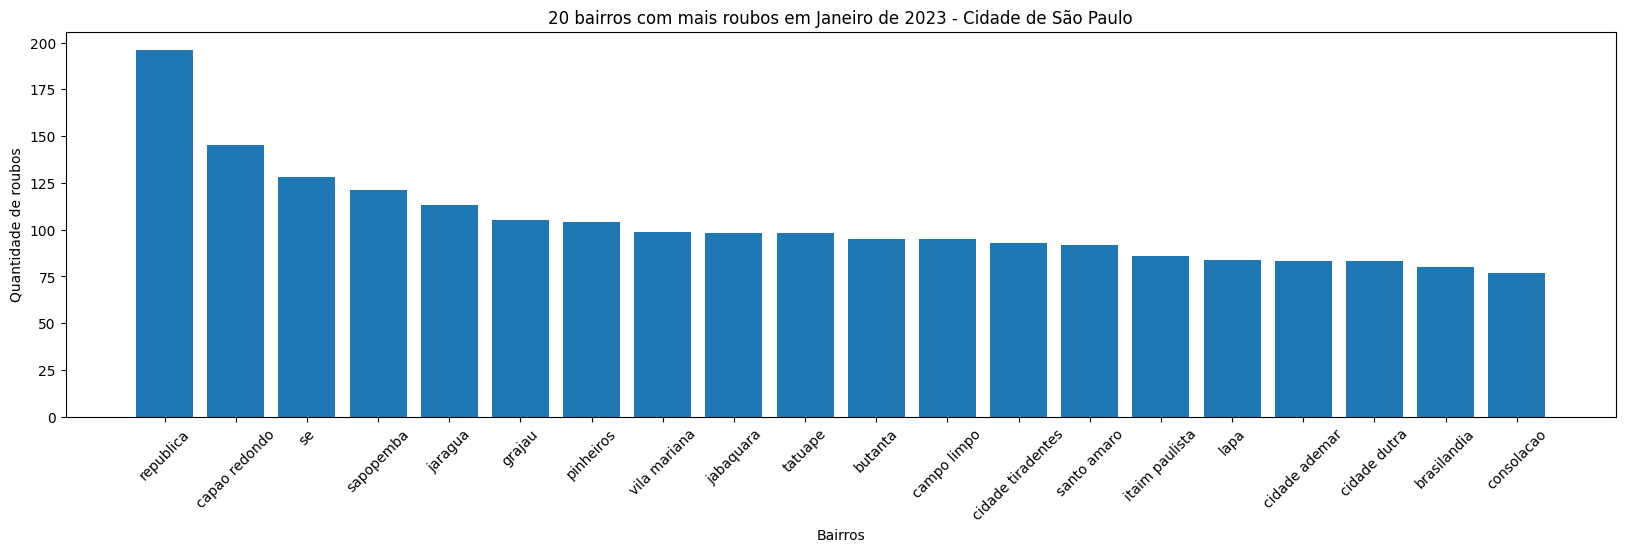

In [56]:
# Bairros com mais roiubos de celulares:

dadosBairros = df['bairro'].map(lambda x : 'bairros nao registrados' if x == '' else x).value_counts().to_dict()

nomeBairros = [nome for (nome, _) in list(dadosBairros.items())[:20]]
roubosBairro = [valor for (_, valor) in list(dadosBairros.items())[:20]]

plt.figure(figsize=(20, 5))
plt.bar(nomeBairros, roubosBairro)
plt.title('20 bairros com mais roubos em Janeiro de 2023 - Cidade de São Paulo')
plt.ylabel('Quantidade de roubos')
plt.xlabel('Bairros')
plt.xticks(rotation=45)
plt.show()

### Período do dia com mais ocorrências de roubos

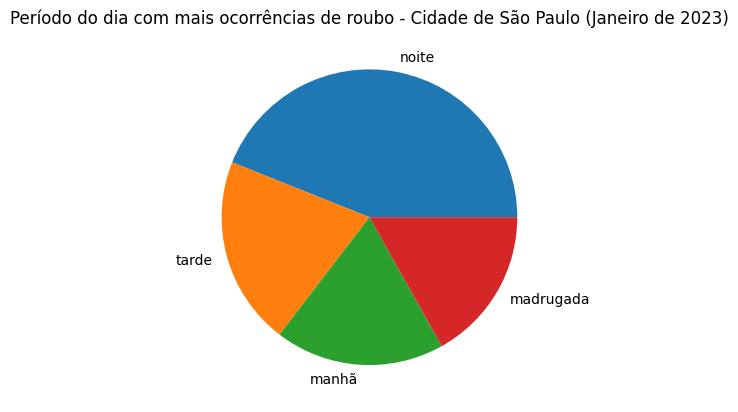

In [57]:
# Período do dia com mais ocorrências de roubos

dadosPeriodo = df['peridoocorrencia'].value_counts().to_dict()
rotulosPeriodo = list(dadosPeriodo.keys())

if 'incerta' in rotulosPeriodo:
    rotulosPeriodo.remove('incerta')

roubosPeriodo = [dadosPeriodo[r] for r in rotulosPeriodo]

plt.pie(roubosPeriodo, labels=rotulosPeriodo)
plt.title('Período do dia com mais ocorrências de roubo - Cidade de São Paulo (Janeiro de 2023)')
plt.show()